## Performing Heirachial and Kmeans clustering on PCA Wines data


## Heirarchial Clustering

In [1]:
# Importing hierarchial clustering libraries

import scipy.cluster.hierarchy as sch # for caluclating distances and creating dendrograms
from sklearn.cluster import AgglomerativeClustering # to cut the tree and form clusters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('C:/Users/Anusha/Desktop/ExcelRProjects/dataset/wine.csv')
data.head(5)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
## Perform Initial EDA


In [3]:
##check for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


### No null values existing in the given dataset

In [4]:
##check for duplicated values
data[data.duplicated()]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


### No duplicated values existing

### Implementation of PCA

In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [6]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
# converting the data to numpy arrays
data_array = data.values
data_array

array([[1.000e+00, 1.423e+01, 1.710e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.000e+00, 1.320e+01, 1.780e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.000e+00, 1.316e+01, 2.360e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [3.000e+00, 1.327e+01, 4.280e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [3.000e+00, 1.317e+01, 2.590e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [3.000e+00, 1.413e+01, 4.100e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [8]:
# Normalize the data
data_normal = scale(data_array)

In [9]:
# Creating PCA's for the given dataset
pca = PCA()
pca_values = pd.DataFrame(pca.fit_transform(data_normal))

In [10]:
pca_values

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716,0.573876,0.055637,-0.458765,1.065570,-0.420494,0.552928,-0.302978,0.200857
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309,-0.029716,1.010372,0.218806,-0.020182,-0.130020,0.394971,-0.146645,0.126402
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842,0.488305,-0.268957,1.222769,-0.106249,-0.279074,0.001898,0.021278,-0.055752
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616,-0.398364,0.618844,-0.114658,0.107671,0.773866,-0.230929,-0.501277,0.019903
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762,0.447876,0.434937,-0.261548,0.112434,-0.537931,-0.226686,0.274109,-0.517498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155,0.843455,-0.206626,-0.125419,-0.392619,0.136783,0.174807,-0.198803,0.093951
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465,0.139947,-0.565588,0.055341,-0.236267,0.254286,-0.277519,-0.185064,-0.024277
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290,0.733026,0.052545,-0.027881,-0.212749,0.502640,0.693336,0.167036,-0.031696
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562,0.755423,0.426512,0.048784,0.479793,0.313786,0.344120,-0.109515,0.102823


In [11]:
# Considering the pca's base on variance proportions
pca_values.var()

0     5.567225
1     2.511184
2     1.454244
3     0.933160
4     0.882460
5     0.676579
6     0.556928
7     0.352012
8     0.296206
9     0.263788
10    0.227124
11    0.169750
12    0.130296
13    0.058139
dtype: float64

In [12]:
## The amount of Variance that each pca explains is
var = pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

##### i.e First pc is holding 39.54 % of information, second pc is holding 17.8% info etc..

In [13]:
## cummulative variance
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

In [14]:
#Calculating weights for each pc
weights=pd.DataFrame(pca.components_)

In [15]:
## The Sum of the squares of the weights should be equals to 1
sum(weights.iloc[:,0]**2)

1.0000000000000009

In [16]:
## Pairs of pca's correlation should be 0
pca_values.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000e+00,2.684098e-18,2.557154e-17,-6.824819e-17,1.482864e-16,7.885842e-17,-2.774062e-17,-4.211791e-17,2.735323e-17,-1.190468e-16,8.199796e-17,-4.000405e-17,-3.387736e-17,1.686846e-16
1,2.684098e-18,1.000000e+00,-3.676182e-17,-3.556635e-16,-1.331488e-16,3.724597e-16,1.856378e-17,1.360972e-16,5.672772e-17,2.967091e-17,1.935182e-16,3.362485e-17,1.600976e-16,-2.610125e-16
2,2.557154e-17,-3.676182e-17,1.000000e+00,3.890255e-16,1.063095e-16,-7.493372e-17,-8.480258e-17,4.729674e-16,1.041712e-16,1.696311e-16,-1.064121e-16,-6.880333e-17,-1.181589e-16,-2.696465e-17
3,-6.824819e-17,-3.556635e-16,3.890255e-16,1.000000e+00,3.321274e-16,5.754757e-16,4.760292e-17,2.829051e-16,-2.040131e-16,-2.608691e-16,-1.064430e-16,2.679183e-17,-1.540258e-17,2.571749e-16
4,1.482864e-16,-1.331488e-16,1.063095e-16,3.321274e-16,1.000000e+00,-2.666646e-16,-3.357598e-16,-3.066743e-16,1.165510e-16,2.388852e-17,6.234728e-17,8.427279e-17,-2.094893e-16,-9.138392e-17
5,7.885842e-17,3.724597e-16,-7.493372e-17,5.754757e-16,-2.666646e-16,1.000000e+00,4.900787e-17,8.691731e-17,-3.502843e-17,2.890601e-17,2.680159e-17,-6.778754e-17,-2.535088e-17,-3.419559e-16
6,-2.774062e-17,1.856378e-17,-8.480258e-17,4.760292e-17,-3.357598e-16,4.900787e-17,1.000000e+00,-2.819774e-16,-2.732261e-16,7.814818e-18,1.070918e-16,-2.237157e-16,-1.818212e-17,-4.109718e-16
7,-4.211791e-17,1.360972e-16,4.729674e-16,2.829051e-16,-3.066743e-16,8.691731e-17,-2.819774e-16,1.000000e+00,-5.497280e-16,-5.096482e-16,1.780211e-16,3.351809e-17,2.786039e-16,-2.362175e-16
8,2.735323e-17,5.672772e-17,1.041712e-16,-2.040131e-16,1.165510e-16,-3.502843e-17,-2.732261e-16,-5.497280e-16,1.000000e+00,-5.723466e-16,3.276781e-16,1.825220e-16,-1.041657e-16,-3.178543e-16
9,-1.190468e-16,2.967091e-17,1.696311e-16,-2.608691e-16,2.388852e-17,2.890601e-17,7.814818e-18,-5.096482e-16,-5.723466e-16,1.000000e+00,-1.895509e-16,3.406487e-16,-2.134137e-16,-9.196064e-17


#### Condition 2 is satisfied - no pca's are correlated to each other

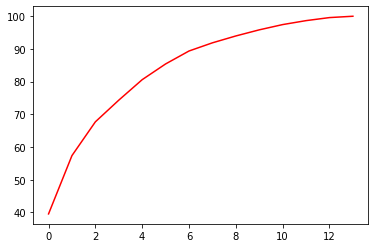

In [17]:
## varicance plot for pca components obtained
plt.plot(var1,color='red')

<AxesSubplot:>

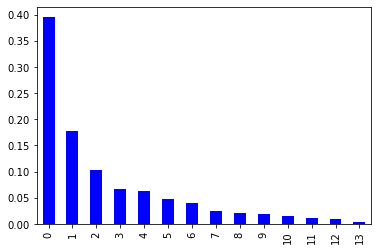

In [18]:
#bar plot for each pca variance visualization
pd.Series(var).plot(kind='bar',color='blue')

<AxesSubplot:>

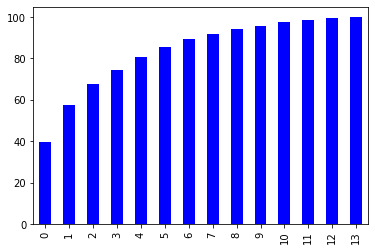

In [19]:
# bar plot for cumulative variance visualization
pd.Series(var1).plot(kind='bar',color='blue')

In [20]:
#Note: In the actual data set if the variables are correlated to each other we can perform pcs's and corrleation problem is solved

### Performing clustering(Heirarchial,Kmeans) using first 3 PC's 

In [21]:
pca_values.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716,0.573876,0.055637,-0.458765,1.06557,-0.420494,0.552928,-0.302978,0.200857


In [22]:
df_pca=pd.DataFrame()
df_pca['FirstPC']=pca_values[0]
df_pca['SecondPC']=pca_values[1]
df_pca['ThirdPC']=pca_values[2]

In [23]:
df_pca

,FirstPC,SecondPC,ThirdPC
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829
...,...,...,...
173,3.627996,-2.206617,-0.343668
174,2.942729,-1.752263,0.207480
175,3.027272,-2.756040,-0.940803
176,2.755222,-2.293784,-0.550474


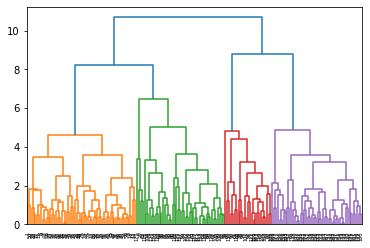

In [24]:
#creating a dendrogram using complete linkage
dendrogram_complete = sch.dendrogram(sch.linkage(df_pca,method = 'complete'))

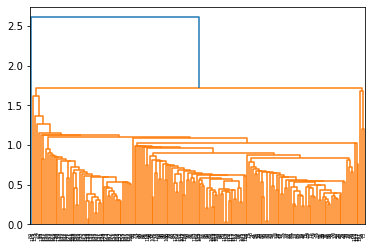

In [26]:
#creating a dendrogram using single linkage
dendrogram_single = sch.dendrogram(sch.linkage(df_pca,method = 'single'))

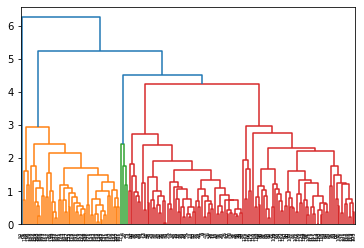

In [27]:
#creating a dendrogram using average linkage
dendrogram_avg = sch.dendrogram(sch.linkage(df_pca,method = 'average'))

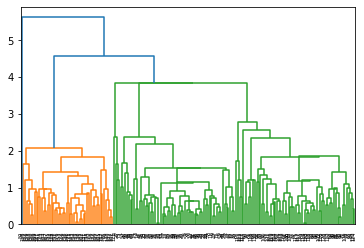

In [28]:
#creating dendrogram using centroid linkage
dendrogram_centroid = sch.dendrogram(sch.linkage(df_pca,method ='centroid'))

###### As we know that when we are cutting dendrograms we should have balanced clusters,from the above all dendrograms we can say centroid linkage is having balanced clusters, balanced clusters: having equal or mostly equal number of data points in all clusters

In [25]:
# create clusters using complete linkage and euclidian distance metric
hc = AgglomerativeClustering(n_clusters = 3,affinity='euclidean',linkage='ward')
hc
# this is just a skelton of algorithm we havent added our data to this algo

AgglomerativeClustering(n_clusters=3)

In [26]:
# applying agglomerative clustering to crime data we use fit_predict
y_hc = hc.fit_predict(df_pca)
y_hc
# covert into dataframe
clusters = pd.DataFrame(y_hc,columns = ['Clusters'])
clusters

,Clusters
0,2
1,2
2,2
3,2
4,2
...,...
173,1
174,1
175,1
176,1


In [27]:
clusters['Clusters'].value_counts()

0    70
2    60
1    48
Name: Clusters, dtype: int64

In [28]:
data_pcs = data.copy()

In [29]:
# adding the clusterID's to the original dataset
data_pcs['h_clusterID']=y_hc
data_pcs.head(3)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2


In [30]:
result= data_pcs.groupby(data_pcs.h_clusterID).mean()
result

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
h_clusterID,,,,,,,,,,,,,,
0,1.985714,12.299286,1.895571,2.222714,19.820000,93.171429,2.229429,2.028429,0.356714,1.581143,3.059286,1.053086,2.752571,527.400000
1,2.979167,13.157708,3.386042,2.437083,21.510417,98.541667,1.681667,0.788542,0.455833,1.167708,7.410833,0.684375,1.698542,627.500000
2,1.050000,13.693167,2.010833,2.477833,17.503333,108.366667,2.862500,3.022833,0.292667,1.940833,5.507833,1.064333,3.177833,1098.483333


### Conclusions  from heirarchial clustering on pca data ,
###### for type 1 wines the diluation rate is less compared to other 2 types and alchol,malic,ash,alcalinity concentration are high -- can be considered as best in wines
###### for type 0 wines the diluation rate is less compared to type 0 and alchol,malic,ash,alcalinity concentration are high compared to type 0 -- can be considered as second quality,type 0 can be considered as low quality




In [31]:
## Performing Kmeans
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

In [32]:
# creating elbow curve for different k values
k = list(range(2,10))
k
TWSS= []# variable for storing total with in sum of squares distance for each kmeans
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_pca)
    wss = []#variable for storing within sum of squares for each cluster
    for j in range(i):
        wss.append(sum(cdist(df_pca.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_pca.shape[1]),"euclidean")))
    TWSS.append(sum(wss))
print("TWSS VALUE",TWSS)
print("WSS VALUES",wss)

TWSS VALUE [array([373.31786516]), array([262.5522272]), array([243.77925734]), array([230.32078459]), array([211.23757341]), array([203.74675545]), array([193.4404769]), array([182.98771859])]
WSS VALUES [array([6.91586521]), array([7.54773187]), array([38.60324432]), array([11.48836046]), array([32.36696834]), array([23.5658597]), array([15.01561994]), array([29.80720929]), array([17.67685946])]


In [33]:
sum(cdist(df_pca.iloc[kmeans.labels_==0,:],kmeans.cluster_centers_[0].reshape(1,df_pca.shape[1]),"euclidean"))

array([6.91586521])

In [34]:
kmeans.cluster_centers_[0].reshape(1,df_pca.shape[1])

array([[-1.55617009, -0.27867544,  3.30460508]])

In [35]:
# for getting cluster centers
(kmeans.cluster_centers_).shape

(9, 3)

[2, 3, 4, 5, 6, 7, 8, 9]


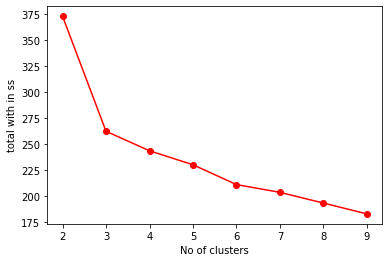

In [36]:
# ploting an elbow graph 
plt.plot(k,TWSS,'ro-');
plt.xlabel("No of clusters");
plt.ylabel("total with in ss")
plt.xticks(k)

# for plot r stands for red color
# o stands for dot and - stands for line
print(k)

#### no of optimised clusters that can be formed using the above elbo curve is 3

In [37]:
data_pcs_kmeans = data.copy()

In [38]:
# Selecting 3 clusters from the above scree plot which is the optimum number of clusters 
Kmeans_clust=KMeans(n_clusters=3)
Kmeans_clust.fit(df_pca)
data_pcs_kmeans['clusterId']=pd.Series(Kmeans_clust.labels_)
data_pcs_kmeans
#pd.Series(Kmeans_clust.labels_)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterId
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [39]:
result = data_pcs_kmeans.groupby(data_pcs_kmeans.clusterId).mean()
result

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clusterId,,,,,,,,,,,,,,
0,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
1,2.000000,12.264478,1.912239,2.224328,19.953731,92.656716,2.235075,2.028507,0.361343,1.597313,3.020896,1.056060,2.775075,507.208955
2,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020


##### Conclusions from kmeans clustering on pca data ,
###### Similar to heirarchial clustering we got the similar results with kmeans clustering 
###### for type 2 wines the diluation rate is less compared to other 2 types and alchol,malic,ash,alcalinity concentration are high -- can be considered as best in wines
###### for type 1 wines the diluation rate is less compared to type 0 and alchol,malic,ash,alcalinity concentration are high compared to type 0 -- can be considered as second quality,type 0 can be considered as low quality¶


## Performing Clustering on Original Data

In [40]:
## heirarchial Clustering
# defining normalization function and standardization function
def norm_func(i):
    x = (i - i.min())/(i.max()-i.min())
    return x
def std_func(i):
    x = (i - i.mean())/(i.std())
    return x

In [41]:
data1=data.copy()

In [42]:
# standardizing the data as there are only numerical values
df_norm = norm_func(data1)
df_norm

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.0,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,1.0,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,1.0,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,1.0,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


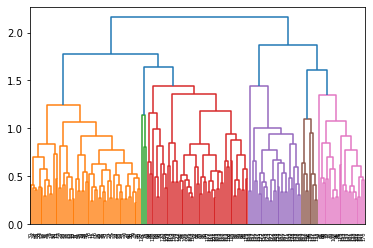

In [43]:
#creating a dendrogram using complete linkage
dendrogram_complete = sch.dendrogram(sch.linkage(df_norm,method = 'complete'))

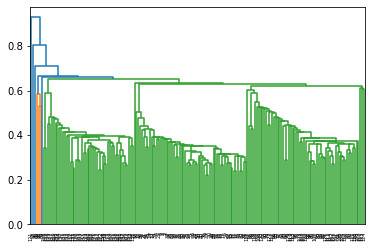

In [48]:
#creating a dendrogram using single linkage
dendrogram_single = sch.dendrogram(sch.linkage(df_norm,method = 'single'))

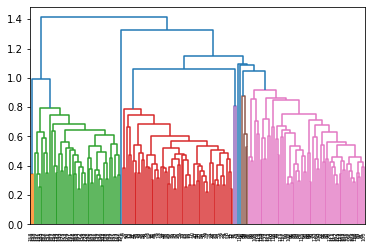

In [49]:
#creating a dendrogram using average linkage
dendrogram_avg = sch.dendrogram(sch.linkage(df_norm,method = 'average'))

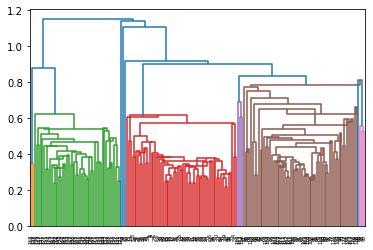

In [50]:
#creating dendrogram using centroid linkage
dendrogram_centroid = sch.dendrogram(sch.linkage(df_norm,method ='centroid'))

In [44]:
# create clusters using complete linkage and euclidian distance metric
hc = AgglomerativeClustering(n_clusters = 3,affinity='euclidean',linkage='ward')
hc
# this is just a skelton of algorithm we havent added our data to this algo

AgglomerativeClustering(n_clusters=3)

In [45]:
# applying agglomerative clustering to crime data we use fit_predict
y_hc = hc.fit_predict(df_norm)
y_hc
# covert into dataframe
clusters = pd.DataFrame(y_hc,columns = ['Clusters'])
clusters

,Clusters
0,2
1,2
2,2
3,2
4,2
...,...
173,1
174,1
175,1
176,1


In [46]:
clusters['Clusters'].value_counts()

0    71
2    59
1    48
Name: Clusters, dtype: int64

In [47]:
# adding the clusterID's to the original dataset
data1['h_clusterID']=y_hc
data1

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [48]:
result= data1.groupby(data1.h_clusterID).mean()
result

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
h_clusterID,,,,,,,,,,,,,,
0,2.0,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
1,3.0,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833
2,1.0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864


#### We got the similar kind of results - similar kind of clusters with heirarchial clustering for original data without PCA's - we can catagories this clusters as best in quality, second and low qualities

In [49]:
data2 = data.copy()

In [50]:
## KMeans for original dataset
df_norm = norm_func(data2)
df_norm

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.0,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,1.0,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,1.0,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,1.0,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [51]:
# creating elbow curve for different k values
k = list(range(2,10))
k
TWSS= []# variable for storing total with in sum of squares distance for each kmeans
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    wss = []#variable for storing within sum of squares for each cluster
    for j in range(i):
        wss.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(wss))
print("TWSS VALUE",TWSS)
print("WSS VALUES",wss)

TWSS VALUE [array([111.54148373]), array([89.30028635]), array([85.54157536]), array([83.52802255]), array([81.68806693]), array([79.59578055]), array([78.18035203]), array([75.94411656])]
WSS VALUES [array([1.79551443]), array([12.8294394]), array([12.83286974]), array([9.33861645]), array([8.1710931]), array([8.81006586]), array([10.08053383]), array([4.27901267]), array([7.80697107])]


In [52]:
sum(cdist(df_norm.iloc[kmeans.labels_==0,:],kmeans.cluster_centers_[0].reshape(1,df_norm.shape[1]),"euclidean"))

array([1.79551443])

In [53]:
kmeans.cluster_centers_[0].reshape(1,df_norm.shape[1])

array([[0.5       , 0.30921053, 0.14130435, 0.42780749, 0.38273196,
        0.82336957, 0.3387931 , 0.26529536, 0.20283019, 0.66719243,
        0.13289249, 0.51422764, 0.47527473, 0.34201141]])

In [54]:
# for getting cluster centers
(kmeans.cluster_centers_).shape

(9, 14)

[2, 3, 4, 5, 6, 7, 8, 9]


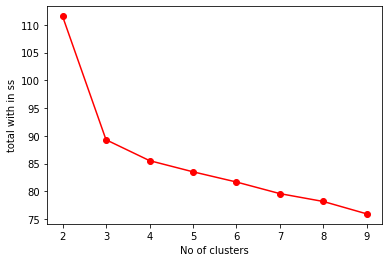

In [55]:
# ploting an elbow graph 
plt.plot(k,TWSS,'ro-');
plt.xlabel("No of clusters");
plt.ylabel("total with in ss")
plt.xticks(k)

# for plot r stands for red color
# o stands for dot and - stands for line
print(k)

In [56]:
### The elbow appear to be smoothening out after four clusters indicating that the optimal number of clusters is 3

In [57]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters 
Kmeans_clust=KMeans(n_clusters=3)
Kmeans_clust.fit(df_norm)
data['clusterId']=pd.Series(Kmeans_clust.labels_)
data
#pd.Series(Kmeans_clust.labels_)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterId
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [58]:
result = data.groupby(data.clusterId).mean()
result

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clusterId,,,,,,,,,,,,,,
0,2.000000,12.257246,1.908551,2.238551,20.063768,94.043478,2.252609,2.076232,0.362319,1.625652,3.057971,1.055739,2.786232,512.826087
1,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020
2,1.016667,13.732167,2.005000,2.458000,17.253333,106.883333,2.847833,2.980833,0.288667,1.900333,5.492000,1.066167,3.163500,1113.533333


###### We got the similar kind of results - similar kind of clusters with Kmeans clustering as well for original data without PCA's - we can catagories this clusters as best in quality, second and low qualities
#### Conclusions
###### by performing pcas , using best 3 pcas we got optimum no. of clusters as 3 and we got the same number of clusters with the original data and all the clusters obtained by heirarchial and kmeans can be categorised in similary manner